<font size="8"><center>Industry Research - Sport Trading Card Market</center></font>
---


<div class="alert alert-warning">

__Author__: -  Kasun Malwenna
    

__Contact__: - kasunmalwenna@gmail.com

---

This notebook contains the data analysis and visualizations to identify current trends in USA trading cards market.
Data aquasition and cleaning process is documented in *__Cleaning_ebay_data.ipynb__* notebook.

 ---
 </div>
    


># Table of Contents


1. [Introduction](#1.-Introduction)


2. [Dataset](#2.-Dataset)

    2.1 [Data Dictionary](#2.1-Data-Dictionary)
    
    2.2 [Importing Datset](#2.2-Importing-Datsets)


3. [Exploratory Data Analysis (EDA)](#3.-Exploratory-Data-Analysis-(EDA))

    3.1 [Price Analysis](#3.1-Price-Analysis)
    
    3.2 [Year Analysis](#3.2-Year-Analysis)
    
    3.3 [Brands Analysis](#3.3-Brands-Analysis)

    3.4 [Location Popularity](#3.4-Location-Popularity)

    3.5 [Reason for Buying](#3.5-Reason-for-Buying)

    3.6 [Autographed Card Analysis](#3.6-Autographed-Card-Analysis)


4. [Recommendations](#4.-Recommendations)

># 1. Introduction


This project is part of a collabarative tech sprint among Data science, UX design and Web Development students challenging to create digital solutions for one of [BrainStation's](https://brainstation.io/) industry partners - [ALT](https://www.alt.xyz/)(a leading sports trading card marketplace).

Sports trading cards can be considered an alternative investment opportunity because the market for these cards can be relatively stable and can offer a potential for high returns. The value of a card is often determined by its rarity, condition, and the popularity of the athlete featured on the card. Some high-value cards have sold for millions of dollars. However, it's important to note that the market for sports cards can be highly speculative and illiquid, and like any other investment, it carries risk. It's also important to conduct research and due diligence before investing in sports cards, as well as to have a long-term horizon.

The USA trading card market is arguably the most prominent and active market there is, and this project focuses on the largest lister in the USA region, eBay, to analyze and compile relevant insights and make recommendations for ALT to provide context and motivation for improvement and future development.

---
># 2. Dataset

The dataset includes PSA graded Trading cards listings from ebay USA. The data is not publically available and was collected using webscrabing ebay. Data was collected on 10th december 2022 and represents the most uptodate "Buy now" listings on ebay.

### 2.1 Data Dictionary



| Variable name   | Description                                    |
|-----------------|------------------------------------------------|
| price           | Price of the card in USD                       |
| title           | The name of the card as displayed in the eBay listing |
| url             | URL to the listing on eBay                     |
| whyToBuy/0      | Reason to by the card                          |
| item_country    | Country the card will be sold from             |
| item_state      | State the card will be sold from               |
| item_city       | City the card will be sold from                |
| card_year       | Year on the card                               |
| card_brand      | Name of the card manufacturer                  |
| card_singed     | If the card is an autographed card             |





The above data dictionary is not a representation of the initially scraped data but a representation of the data after data wrangling and feature engineering. Since there is an overwhelming number of lower-priced cards, only a limited number of cards below USD 100 were scraped while no limit was considered for higher priced cards.

### 2.2 Importing Datset 

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
# Load and check ebay clean data
df = pd.read_csv('psa data/ebay_cards_cleaned.csv')
df.head()

,price,title,url,whyToBuy/0,item_country,item_state,item_city,card_year,card_brand,card_singed
0,12630069.0,1986 86 Fleer Michael Jordan Rookie Sticker PS...,https://www.ebay.com/itm/324272400062,Ships from United States,United States,Michigan,Dearborn,1986,Fleer,No
1,4500000.0,2003 TOM BRADY LEAF LIMITED # 12/12 GAME-WORN-...,https://www.ebay.com/itm/195509543378,Ships from United States,United States,Michigan,Livonia,2003,Leaf,No
2,3200000.0,RARE ( PLAYERS HONORS )(#/10) 2000 TOM BRADY R...,https://www.ebay.com/itm/193723287418,Ships from United States,United States,Michigan,Livonia,2000,Playoff,No
3,2000000.0,2018-19 PANINI CONTENDERS LUKA DONCIC PREMIUM ...,https://www.ebay.com/itm/165123068721,Ships from United States,United States,California,Rancho Cucamonga,2018,Panini,No
4,1500000.0,2020 Topps Chrome F1 Lewis Hamilton Silver Ref...,https://www.ebay.com/itm/194656052157,Free shipping and returns,United States,Virginia,Sterling,2020,Topps,No


In [3]:
# check the shape of the data
print(f'Data set has {df.shape[0]} rows and {df.shape[1]} columns')

Data set has 44314 rows and 10 columns


In [4]:
# check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44314 entries, 0 to 44313
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         44314 non-null  float64
 1   title         44314 non-null  object 
 2   url           44314 non-null  object 
 3   whyToBuy/0    44314 non-null  object 
 4   item_country  44314 non-null  object 
 5   item_state    44314 non-null  object 
 6   item_city     44314 non-null  object 
 7   card_year     44314 non-null  int64  
 8   card_brand    44314 non-null  object 
 9   card_singed   44314 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


In [5]:
# chek  the missing values
df.isnull().sum()


price           0
title           0
url             0
whyToBuy/0      0
item_country    0
item_state      0
item_city       0
card_year       0
card_brand      0
card_singed     0
dtype: int64

No missing values in the data set.

---
># 3. Exploratory Data Analysis (EDA)

### 3.1 Price Analysis

In [6]:
# Descibe price column
df['price'].describe()

count    4.431400e+04
mean     9.602553e+03
std      7.489144e+04
min      9.900000e-01
25%      1.000000e+03
50%      2.995000e+03
75%      8.000000e+03
max      1.263007e+07
Name: price, dtype: float64

In [7]:
round(df.price.max(),-5) /1000000

12.6

In [8]:
print(f"The highest valued card listed is price at approximately ${round(df.price.max(),-5) /1000000} million")
print(f'The lowest valued card listed is priced at approximately ${int(round(df.price.min(),1))}')
print(f'The average price of a card is about ${int(round(df.price.mean(),-2))}')

The highest valued card listed is price at approximately $12.6 million
The lowest valued card listed is priced at approximately $1
The average price of a card is about $9600


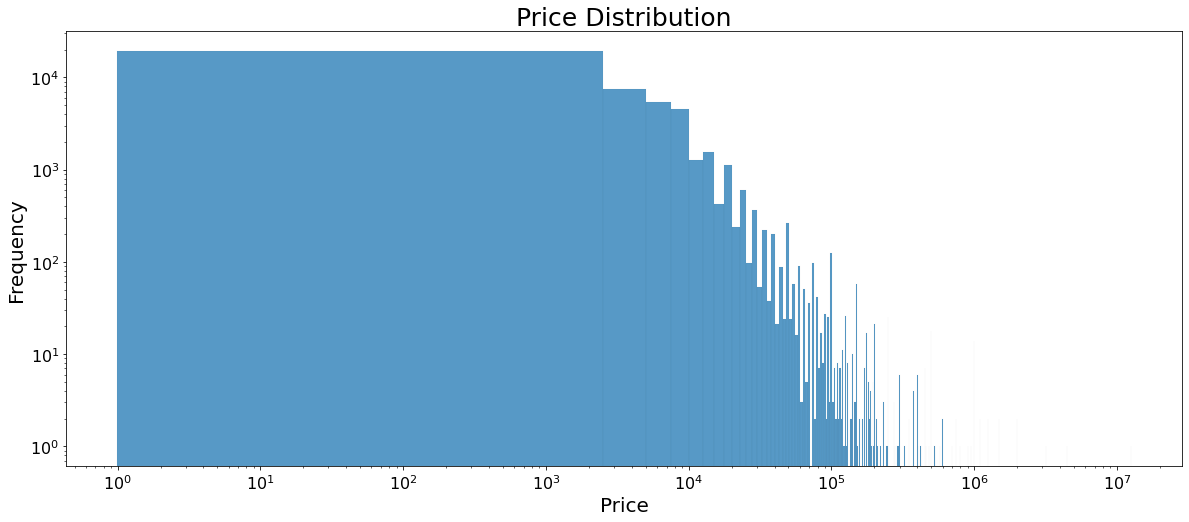

In [9]:
# price distribution
plt.figure(figsize=(20, 8))
sns.histplot(data=df, x="price", bins=5000, kde=False)
plt.yscale('log')
plt.xscale('log')
plt.title('Price Distribution', fontsize=25)
plt.xlabel('Price', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()


- There is an abundance of cards valued below $1000, making them highly sought after by both collectors and sellers. 

- There is a sharp decline in the number of offerings as the value of these cards increases, likely because buyers are not willing to spend much on a card, combined with the fact that the rarer, more valuable cards are much harder to come by.

### 3.2 Year Analysis

##### 3.2.1 Which card years has the most listings?

In [10]:
# group by card year    
df_year = df.groupby('card_year').agg({'price': ['mean', 'median', 'count']})
df_year.columns = ['mean', 'median', 'count']
#df_year = df_year.reset_index()
df_year.sort_values(by=(['count']), ascending=False, inplace=True)

# top 30 years by count
df_year_count = df_year.head(20)
df_year_count = df_year_count.reset_index()
df_year_count.sort_values(by=(['card_year']), ascending=True, inplace=True)
df_year_count

,card_year,mean,median,count
11,1986,29304.466586,6500.000,914
14,1996,10382.073108,2999.000,798
18,1998,8569.889328,2999.990,521
12,2000,23168.277958,7421.865,862
6,2003,15486.964625,3000.000,1172
17,2005,12328.425578,3000.000,554
19,2007,10475.263881,3000.000,505
15,2009,16379.264189,5500.000,752
16,2011,11998.425057,3000.000,611
8,2012,7944.106643,2799.950,977


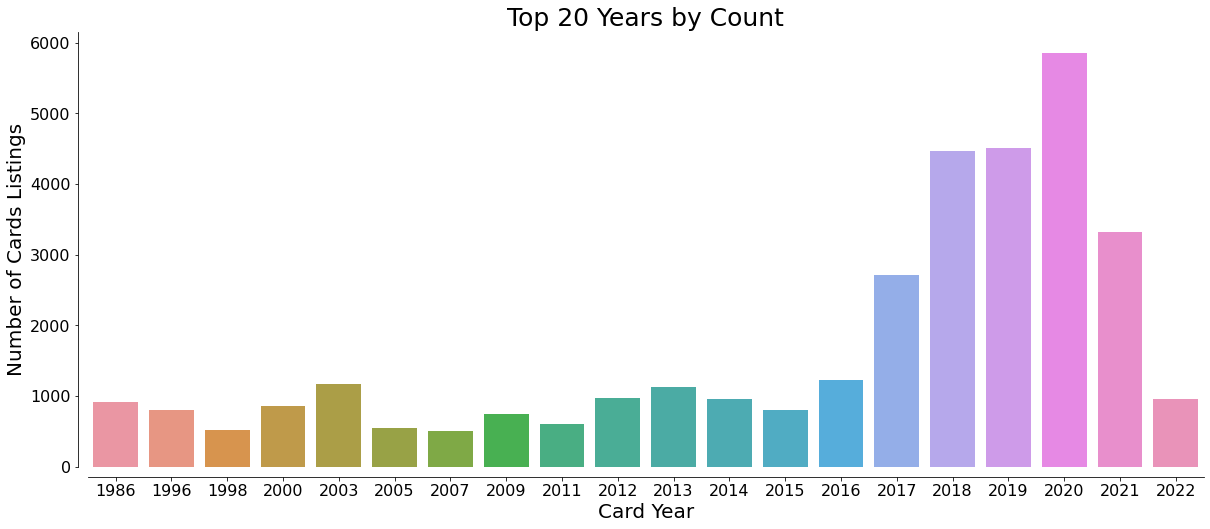

In [11]:
#plot top 20 years by count
plt.figure(figsize=(20, 8))
sns.barplot(data=df_year_count, x="card_year", y="count")
sns.despine(offset=10, trim=False)
plt.title('Top 20 Years by Count', fontsize=25)
plt.ylabel('Number of Cards Listings', fontsize=20)
plt.xlabel('Card Year', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

Observations
- 2020 stands out as the year with the most cards available on the market. 
- newer cards are the most listed cards compared to older cards, can be due to the fact that older cards are more expensive and harder to find
- The listings on canrds fron 2021 dropped singnificantly. perhaps due to the lack of popularity of sports during the pandami.

##### 3.2.2 Which year cards are most valuble?

In [12]:

df_year.sort_values(by=(['mean']), ascending=False, inplace=True)
df_year.head(30)

# top 30 years by mean
df_year_average = df_year.head(20)
df_year_average = df_year_average.reset_index()
df_year_average.sort_values(by=(['card_year']), ascending=True, inplace=True)
df_year_average

,card_year,mean,median,count
17,1909,13721.461967,8900.475,122
10,1910,17756.091176,7149.990,34
19,1911,13199.278718,7275.000,39
1,1913,53949.500000,53949.500,2
6,1914,23873.130667,5500.000,15
11,1916,16499.500000,16499.500,2
18,1921,13661.876875,6765.000,16
15,1922,15276.656000,7999.950,15
3,1924,33275.000000,33275.000,1
0,1925,150000.000000,150000.000,1


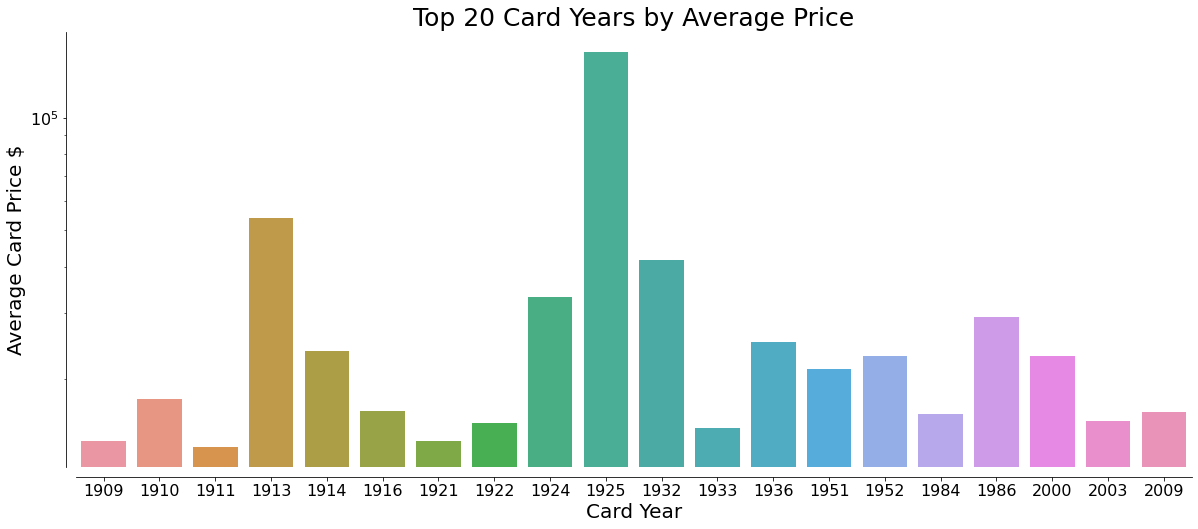

In [13]:
#plot top 20 years by count
plt.figure(figsize=(20, 8))
sns.barplot(data=df_year_average, x="card_year", y="mean")
sns.despine(offset=10, trim=False)
plt.title('Top 20 Card Years by Average Price', fontsize=25)
plt.ylabel('Average Card Price $', fontsize=20)
plt.xlabel('Card Year', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.yscale('log')
plt.show()


Observations
- The vintage cards of 1925 stand out as having the greatest value, averaging a staggering $1.5 million each. 
- It's clear that the older cards bear more value than the more recent ones, with the most recent years even being completely absent from the top most expensive cards by year range. 
- There are notable peaks in the average values of cards from 1913, 1924, 1932, and 1986, which can be attributed to the great players and historical plays of those years.

### 3.3 Brands Analysis

##### 3.3.1 most popular trading card brands

In [14]:
# group by card brand   
df_brand = df.groupby('card_brand').agg({'price': ['mean', 'median', 'count']})
df_brand.columns = ['mean', 'median', 'count']
#df_year = df_year.reset_index()
df_brand.sort_values(by=(['count']), ascending=False, inplace=True)
df_brand.head(10)

,mean,median,count
card_brand,,,
Panini,8103.844060,2800.995,13582
Topps,8950.002147,2888.880,12713
Bowman,9052.985660,2999.990,6224
Fleer,19099.362313,5700.000,2045
Upper Deck,10082.993152,2799.980,1834
Donruss,6266.863333,2000.000,1764
Select,11189.262567,2999.000,1352
Leaf,14901.737784,2999.000,853
Skybox,8546.560868,2999.990,403


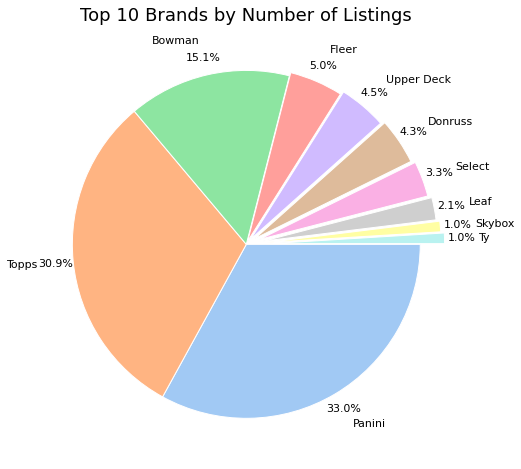

In [15]:
# pie chart of top 10 brands by count
df_brand_count = df_brand.head(10)
df_brand_count = df_brand_count.reset_index()
df_brand_count.sort_values(by=(['count']), ascending=False, inplace=True)
df_brand_count

#plot top 10 brands by count
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:10]

plt.figure(figsize=(15, 8))
plt.pie(df_brand_count['count'], labels=df_brand_count['card_brand'], colors = colors, autopct='%1.1f%%',
pctdistance=1.1, labeldistance=1.2, radius=1, counterclock=False, 
wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
explode=[0.0, 0, 0, 0.02, 0.04,0.06, 0.08, 0.1, 0.12, 0.14], textprops={'fontsize': 11})
plt.title('Top 10 Brands by Number of Listings', fontsize=18)
plt.show()


Observations:

__Topps__ and __Panini__ absolutely reign in the top trading cards market, having an impressive 60% of the marketplace accounted for. Not to be outdone, __Bowman__ still holds a substantial sway in the sector.

##### 3.3.2 Most valued trading card brands

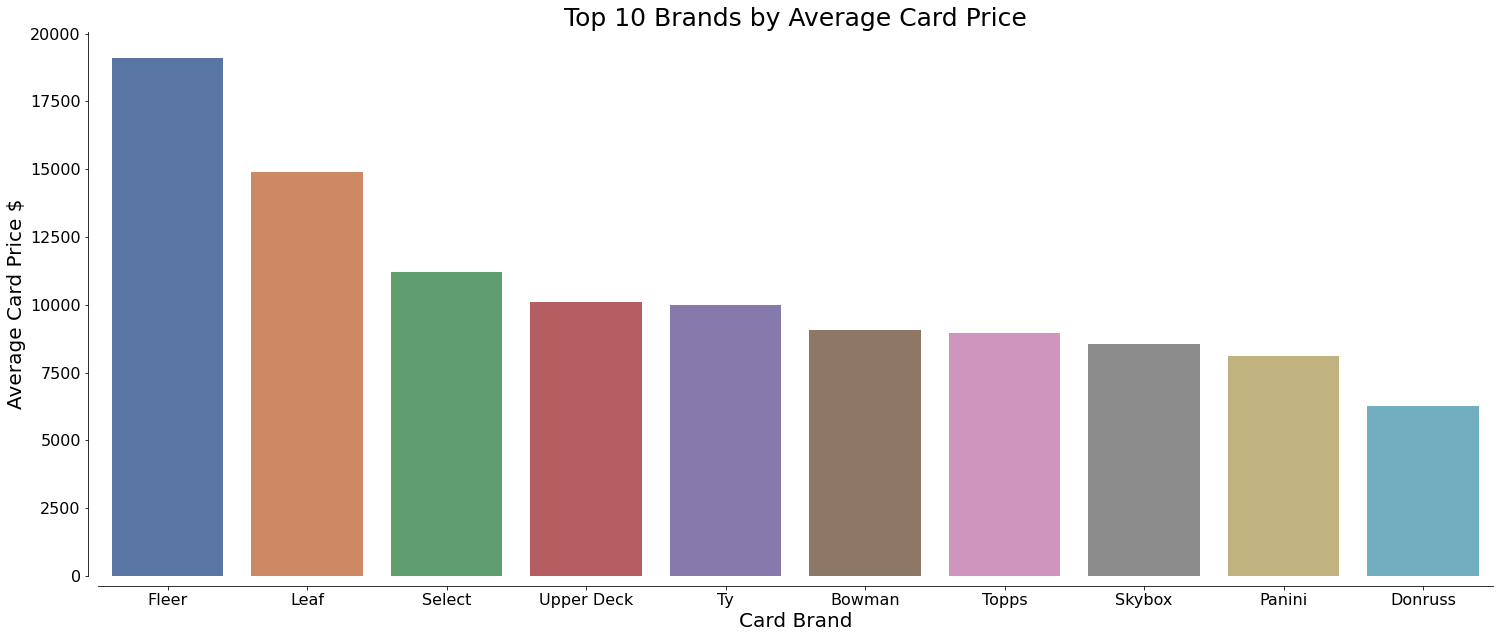

In [16]:
# bar plot of top 10 brands by mean
df_brand_average = df_brand.head(10)
df_brand_average = df_brand_average.reset_index()
df_brand_average.sort_values(by=(['mean']), ascending=False, inplace=True)
df_brand_average

#plot top 10 brands by mean
plt.figure(figsize=(25, 10))
sns.barplot(data=df_brand_average, x="card_brand", y="mean", palette="deep")
sns.despine(offset=10, trim=False)
plt.title('Top 10 Brands by Average Card Price', fontsize=25)
plt.ylabel('Average Card Price $', fontsize=20)
plt.xlabel('Card Brand', fontsize=20)
#plt.yscale('log')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()


Observations:

Although __Topps__ and __Panini__ may appear to be the dominating brands, it is actually __Fleer__ who commands the highest average card price. Generally, the other brands in the top ten all come close, with a price point of around $10,000 per card, minus __Leaf__ and __Fleer__. Consequently, it is clear that __Fleer__ reigns supreme as the leader in card prices.


### 3.4 Location Popularity

##### 3.4.1 Which states are collectors hot spots in the US?

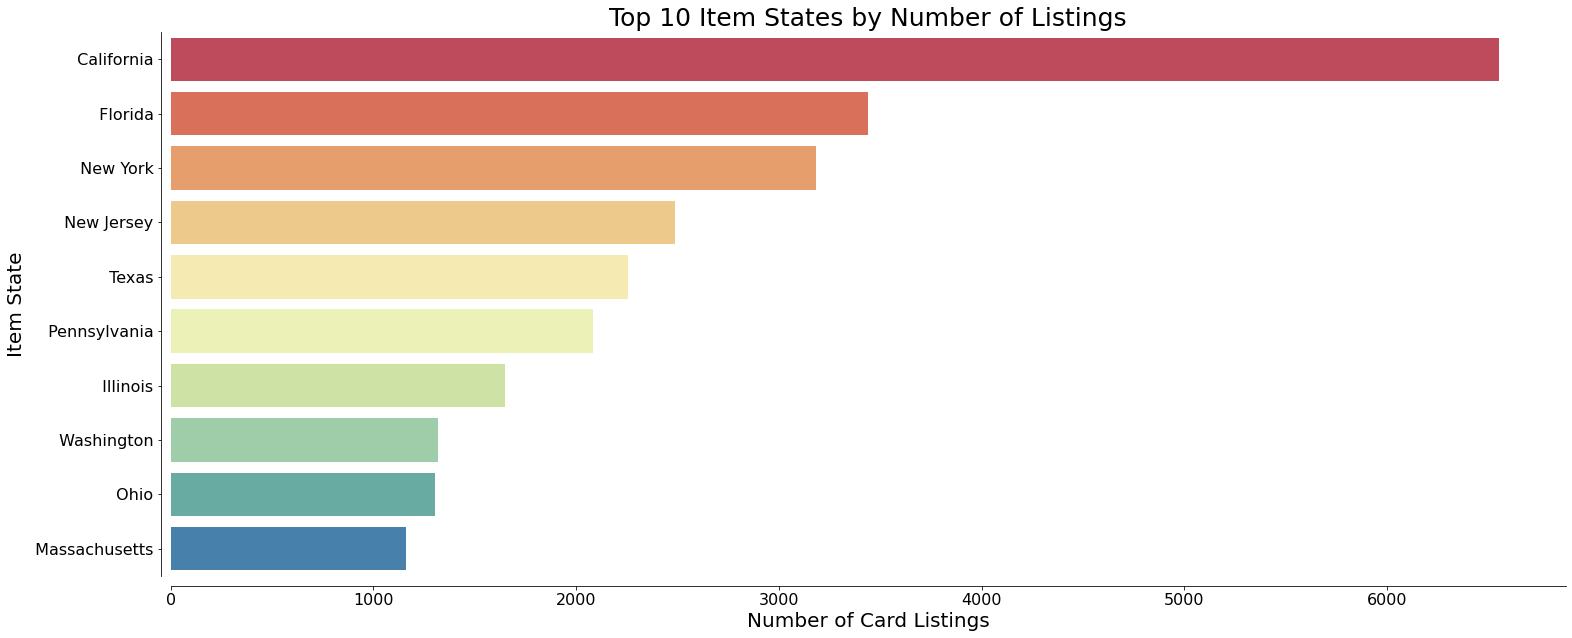

In [17]:
# Horizontal bar plot of top 10 item_state by count
df_state = df.groupby('item_state').agg({'price': ['mean', 'median', 'count']})
df_state.columns = ['mean', 'median', 'count']
#df_year = df_year.reset_index()
df_state.sort_values(by=(['count']), ascending=False, inplace=True)
df_state.head(10)

# bar plot of top 10 item_state by count
df_state_count = df_state.head(10)
df_state_count = df_state_count.reset_index()


#plot top 10 item_state by count
plt.figure(figsize=(25, 10))
sns.barplot(data=df_state_count, x="count", y="item_state", palette="Spectral")
sns.despine(offset=10, trim=False)
plt.title('Top 10 Item States by Number of Listings', fontsize=25)
plt.ylabel('Item State', fontsize=20)
plt.xlabel('Number of Card Listings', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()


Observations:
- There is a huge market for trading cards in the US.
- California leads the pack when it comes to ALT's business opportunities in the US, followed by New York and Florida.

##### 3.4.2 Most popular provinces for sellers and collectors in Canada

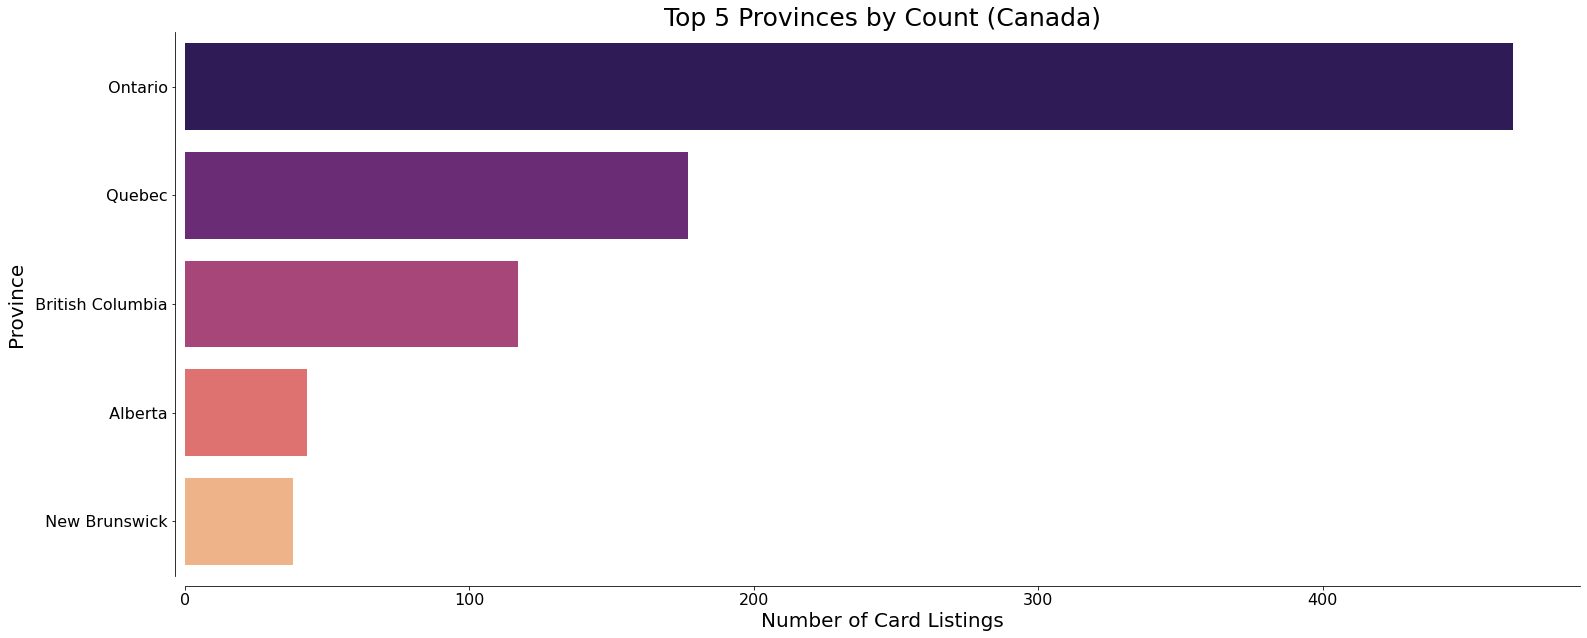

In [18]:
# Horizontal bar plot of top 10 item_state by count whre item_country is Canada
df_state_canada = df[df['item_country'] == ' Canada']
df_state_canada = df_state_canada.groupby('item_state').agg({'price': ['mean', 'median', 'count']})
df_state_canada.columns = ['mean', 'median', 'count']
df_state_canada.sort_values(by=(['count']), ascending=False, inplace=True)


# bar plot of top 10 item_state by count where item_country is Canada
df_state_canada_count = df_state_canada.head(5)
df_state_canada_count = df_state_canada_count.reset_index()


#plot top 10 item_state by count where item_country is Canada
plt.figure(figsize=(25, 10))
sns.barplot(data=df_state_canada_count, x="count", y="item_state", palette="magma")

sns.despine(offset=10, trim=False)
plt.title('Top 5 Provinces by Count (Canada)', fontsize=25)
plt.ylabel('Province', fontsize=20)
plt.xlabel('Number of Card Listings', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()



Observations:

Although Canada's trading card market does not appear to be quite as bustling as America's, Ontario and Quebec are the frontrunners in terms of trading card listings.These two provinces, in particular, can bring in a significant amount of profits for ALT, and their markets can also serve as a testing ground.

##### 3.4.3 Top cities for trading cards in most popular province in canada

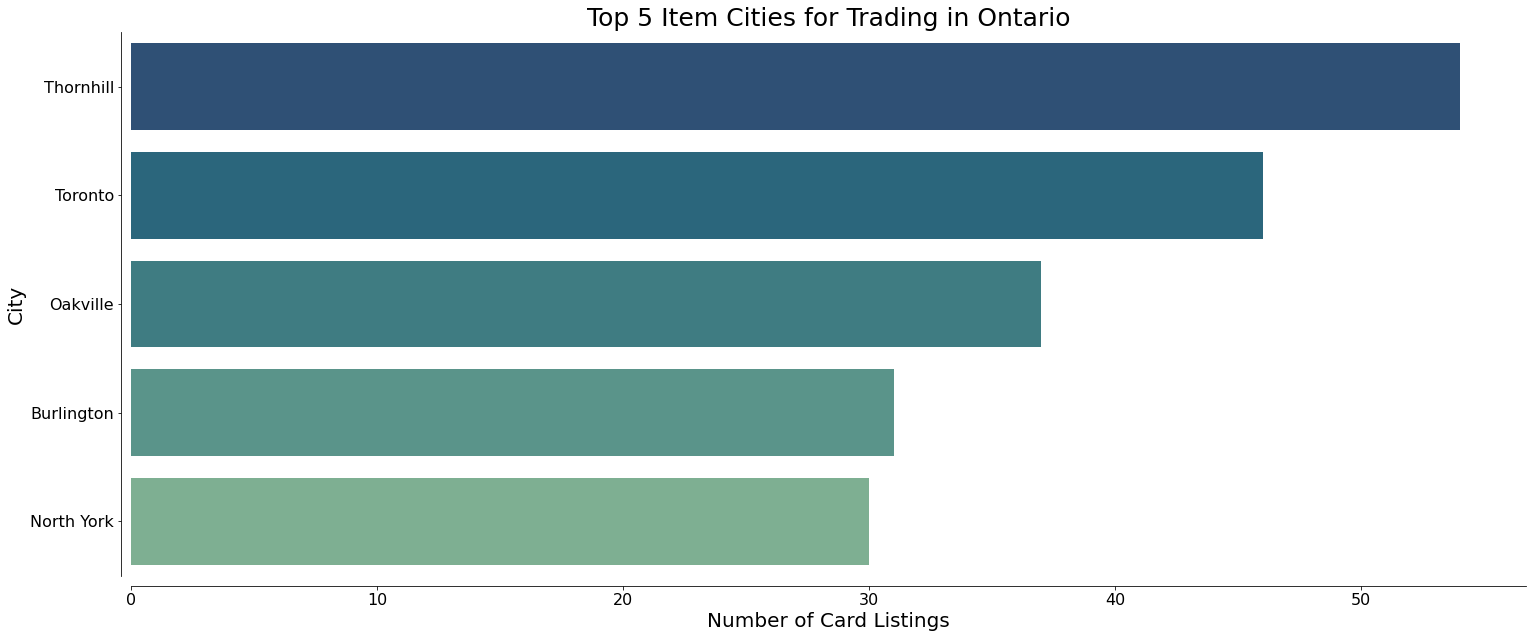

In [19]:
# Horizontal bar plot of top 5 item_cit by count whre item_country is Ontario
df_city_ontario = df[df['item_state'] == ' Ontario']
df_city_ontario = df_city_ontario.groupby('item_city').agg({'price': ['mean', 'median', 'count']})
df_city_ontario.columns = ['mean', 'median', 'count']
df_city_ontario.sort_values(by=(['count']), ascending=False, inplace=True)


# bar plot of top 5 item_city by count where item_state is Ontario
df_city_ontario_count = df_city_ontario.head(5)
df_city_ontario_count = df_city_ontario_count.reset_index()


#plot top 5 item_city by count where item_state is Ontario
plt.figure(figsize=(25, 10))
sns.barplot(data=df_city_ontario_count, x="count", y="item_city", palette="crest_r")

sns.despine(offset=10, trim=False)
plt.title('Top 5 Item Cities for Trading in Ontario', fontsize=25)
plt.ylabel('City', fontsize=20)
plt.xlabel('Number of Card Listings', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

Observations:

Above is a list of most active cities in ontario in terms of card sellers.

### 3.5 Reason for Buying

##### 3.5.1 What are the most pursavasive reasons to buy trading cards?

In [20]:
# most popular reason listed for buying card in whyToBuy/0 column
df_whyToBuy = df.groupby('whyToBuy/0').agg({'price': ['mean', 'median', 'count']})
df_whyToBuy.columns = ['mean', 'median', 'count']
df_whyToBuy.sort_values(by=(['count']), ascending=False, inplace=True)
df_whyToBuy.head(10)

,mean,median,count
whyToBuy/0,,,
Ships from United States,9919.246357,2999.000,32834
Returns accepted,7263.642148,2000.000,4661
Unknown,5371.486214,1999.990,2818
Free shipping and returns,11924.112200,5499.990,1432
5 watchers,9783.481304,5997.475,184
6 watchers,10528.028165,6000.000,158
7 watchers,16828.944640,6990.000,125
8 watchers,12777.844754,7000.000,122
Ships from,1879.053953,1999.000,86


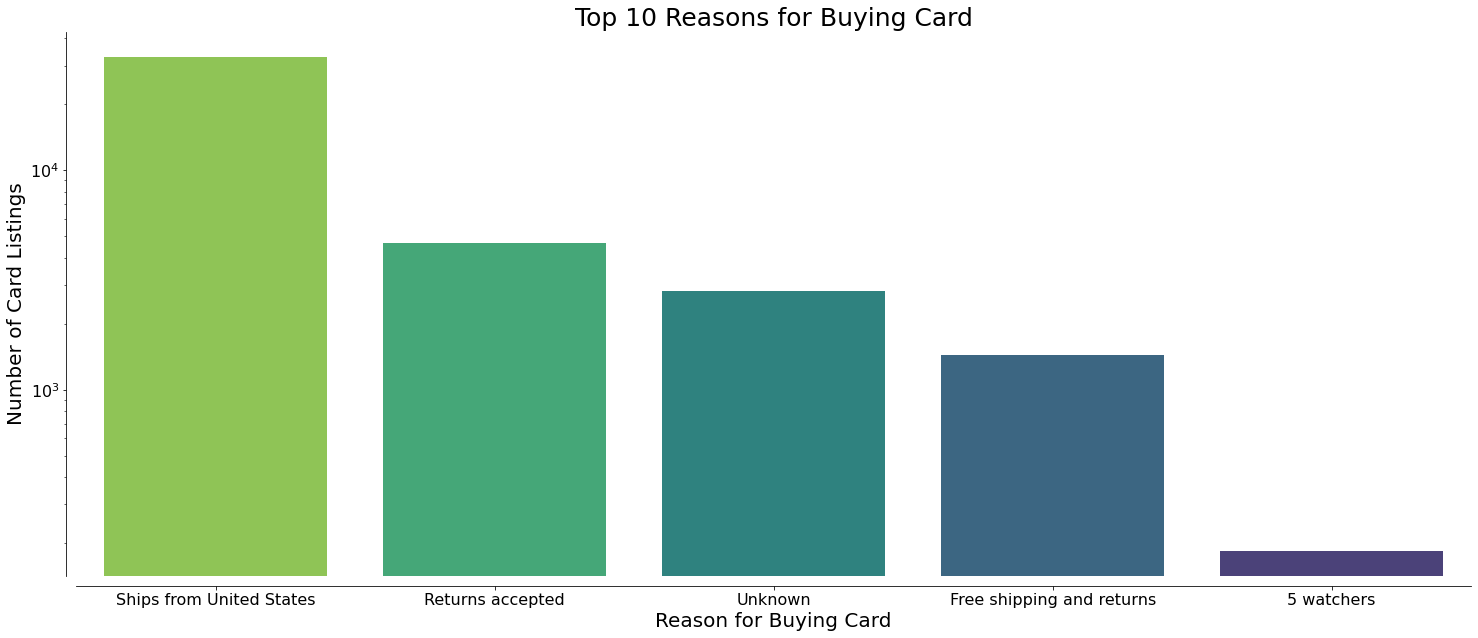

In [21]:
#plot top 5 reasons for buying card

df_whyToBuy_count = df_whyToBuy.head(5)
df_whyToBuy_count = df_whyToBuy_count.reset_index()

plt.figure(figsize=(25, 10))
#colors = sns.color_palette("YlOrBr")
sns.barplot(data=df_whyToBuy_count, y="count", x="whyToBuy/0", palette="viridis_r" )
sns.despine(offset=10, trim=False)
plt.title('Top 10 Reasons for Buying Card', fontsize=25)
plt.xlabel('Reason for Buying Card', fontsize=20)
plt.ylabel('Number of Card Listings', fontsize=20)
plt.yscale('log')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()


Observations:

The purchase of cards is driven in large part by their accessibility and convenience; if the card is located in the same country as the buyer, they are much more likely to make the purchase. Furthermore, buyers tend to be drawn to cards that come with the assurances of free shipping and a return policy. These factors, combined, make it much more enticing for buyers to choose the card they purchase.

### 3.6 Autographed Card Analysis

In [22]:
# Make subplotts from card_singed column
df_singed = df.groupby('card_singed').agg({'price': ['mean', 'count']})
df_singed.columns = ['mean', 'count']
df_singed

,mean,count
card_singed,,
No,9591.51504,42002
Yes,9803.08830,2312


#### 3.6.1 Autograph Cards market analysis

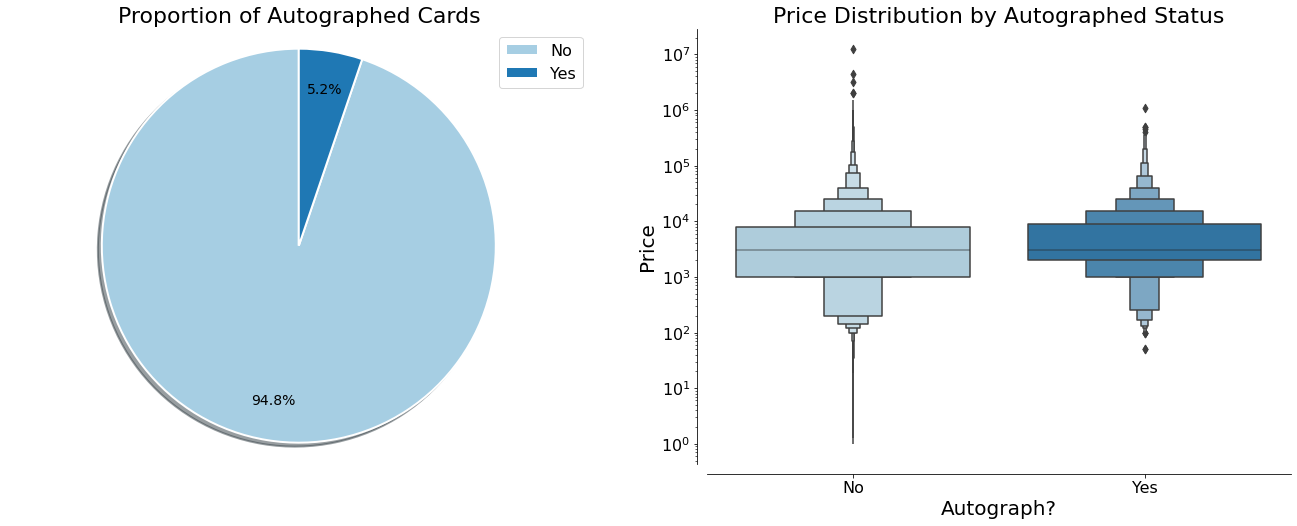

In [23]:
# subplots of price by card_singed
plt.figure(figsize=(23, 8))


#  pie chart of card_singed
colors = sns.color_palette('Paired')
plt.subplot(1, 2, 1)
plt.pie(df_singed['count'], labels=None, autopct='%1.1f%%', colors=colors, shadow=True, startangle=90,
pctdistance=0.8, radius=1, wedgeprops={'linewidth': 2, 'edgecolor': 'white'}, textprops={'fontsize': 14})
plt.title('Proportion of Autographed Cards', fontsize=22)
plt.axis('equal')
plt.legend(labels=df_singed.index, loc='upper right', fontsize=16) 

# boxexplot of price by card_singed
plt.subplot(1, 2, 2)
sns.boxenplot(data=df, x="card_singed", y="price", palette=colors)
sns.despine(offset=10, trim=False)
plt.title('Price Distribution by Autographed Status', fontsize=22)
plt.xlabel('Autograph?', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.yscale('log')
plt.show()


Observations:

Autographed cards account for a mere 5% of all listings, and their prices tend to be  higher than regular cards. Plus, the pricing of autographed cards is not very heterogeneous, making it difficult to find inexpensive ones. Clearly, it is well worth investing in autographs cards, as they are rare and holds the most value.

In [24]:
singed = df[df['card_singed'] == 'Yes']

# group by brand
df_singed_brand = singed.groupby('card_brand').agg({'price': ['mean', 'count', 'max', 'min']})
df_singed_brand.columns = ['mean', 'count', 'max', 'min']
df_singed_brand.sort_values(by=(['count']), ascending=False, inplace=True)
df_singed_brand.head(15)

,mean,count,max,min
card_brand,,,,
Topps,7820.090398,703,500000.00,100.00
Panini,9471.931734,548,500000.00,50.00
Bowman,10132.728059,443,450000.00,49.99
Upper Deck,19432.840942,138,1100000.00,129.99
Fleer,8548.649091,110,75000.00,149.99
Leaf,5358.661613,93,75000.00,105.99
Donruss,5710.643235,68,50000.00,179.99
Playoff,18111.742917,24,79999.00,199.99
Press Pass,16268.820435,23,150000.00,289.99


#### 3.6.2 Dominant Brands in autographed cards

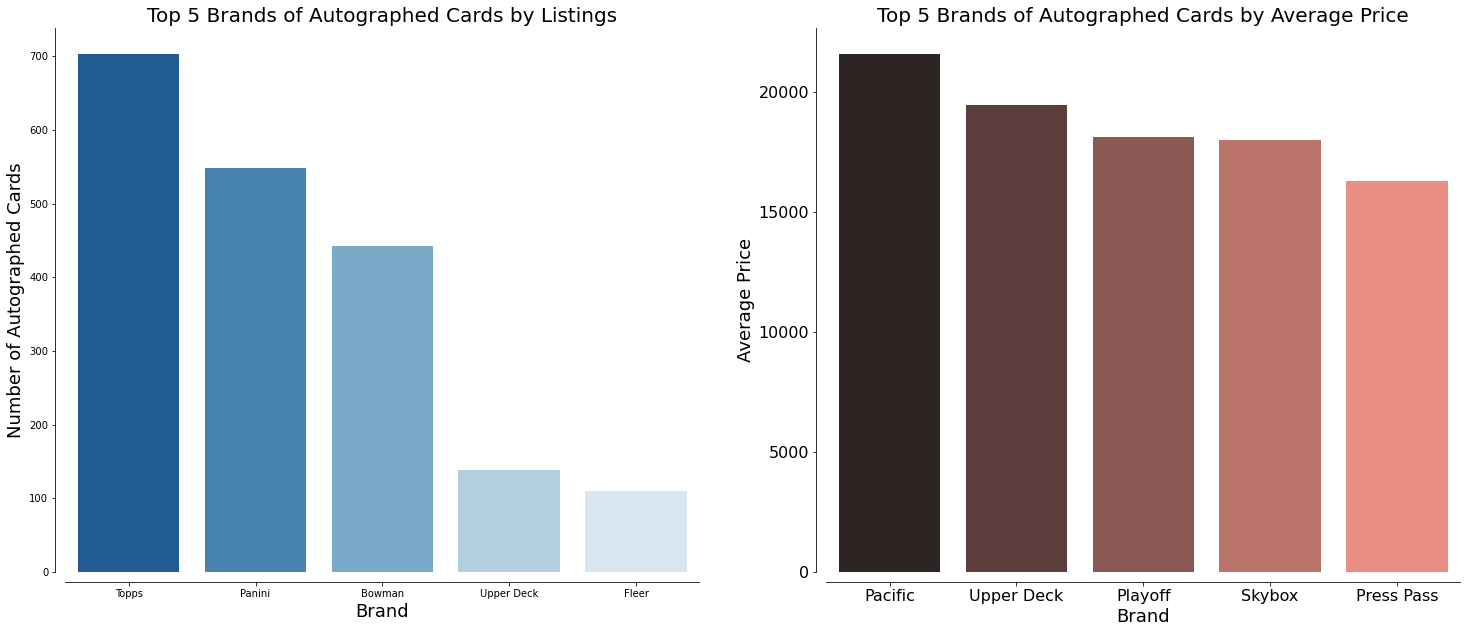

In [25]:
# sub plots
plt.figure(figsize=(25, 10))

# bar plot of top 5 brands of autographed cards
plt.subplot(1, 2, 1)
df_singed_brand_count = df_singed_brand.head(5)
df_singed_brand_count = df_singed_brand_count.reset_index()

sns.barplot(data=df_singed_brand_count, y="count", x ="card_brand", palette="Blues_r")
sns.despine(offset=10, trim=False)
plt.title('Top 5 Brands of Autographed Cards by Listings', fontsize=20)
plt.xlabel('Brand', fontsize=18)
plt.ylabel('Number of Autographed Cards', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# bar plot of top 5 brands of autographed cards by mean price
plt.subplot(1, 2, 2)
df_singed_brand_mean = df_singed_brand.head(15)
df_singed_brand_mean = df_singed_brand_mean.sort_values(by=(['mean']), ascending=False).head(5)
df_singed_brand_mean = df_singed_brand_mean.reset_index()

sns.barplot(data=df_singed_brand_mean, y="mean", x ="card_brand", palette="dark:salmon")
sns.despine(offset=10, trim=False)
plt.title('Top 5 Brands of Autographed Cards by Average Price', fontsize=20)
plt.xlabel('Brand', fontsize=18)
plt.ylabel('Average Price', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()



Observations:

Upper Deck is a great choice for anyone looking to invest in autographed cards; Topps, Panini, and Bowman may offer the most in terms of quantity on the eBay marketplace, but Upper Deck ranks among the top five for both quantity and price, boasting the highest average value for autographed cards.

---

># 4. Recommendations
    

<div class="alert alert-info">
    

    
    
- US market holds a substantial share of card dealings, with the top ten states/provinces being American. Consequently, ALT can expect a much higher quantity of investment prospects from the US as compared to the Canadian market.
    
- When it comes to Canada, though, Ontario and Quebec are the hub of all activity. ALT can target other provinces by implementing innovative promotions and marketing solutions to popularize their platform. 
    
- ALT could boost webtraffic by offering desirable cards from the leading producers, including Topps, Panini, and Bowman.
    
- By offering cost-effective expedited shipping and a generous return policy, ALT can convince skeptical buyers to make a purchase.

- Upper Deck has become easy to find brand for autographed cards, as well as commanding an impressive average card price. Acquiring such cards could present an excellent investment opportunity.

---